In [1]:
import numpy as np

In [26]:
from keras.utils import to_categorical

In [40]:
labels = np.load("./svhn/train_preprocessed_labels.npy")
digit_len = to_categorical( np.array( list(map(len, labels)) , dtype=np.int), num_classes=7 )

In [41]:
def load_npy(prefix):
    xs = np.load("./svhn/{}_preprocessed_img.npy".format(prefix))
    labels = np.load("./svhn/{}_preprocessed_labels.npy".format(prefix))
    # RGB => Grayscale
    xs = np.dot(xs, [0.299, 0.587, 0.114]).reshape(xs.shape[0], 32, 32, 1) * 1./255
    # getting length only for now
    digit_len = to_categorical( np.array( list(map(len, labels)) , dtype=np.int), num_classes=7 )
    digit_0 = to_categorical( np.array( list(map(lambda x: x[-1], labels)) , dtype=np.int), num_classes=10 )
    return xs, (digit_len, digit_0)
    
def load_data():
    x_train, y_train = load_npy("train")
    x_test, y_test = load_npy("test")
    return x_train, y_train, x_test, y_test


In [42]:
x_train, y_train, x_test, y_test = load_data()

In [43]:
from keras.preprocessing.image import array_to_img

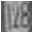

In [44]:
array_to_img(x_train[8])

In [47]:
np.argmax(y_train[0][8]), np.argmax(y_train[1][8])

(3, 8)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


Using TensorFlow backend.


In [14]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          18496     
__________

In [32]:
model.fit(x_train, y_train, validation_split=0.2, epochs=5)

Train on 26721 samples, validate on 6681 samples
Epoch 1/5
26721/26721 [==============================] - 18s - loss: 0.6887 - acc: 0.7166 - val_loss: 0.7848 - val_acc: 0.6668

In [39]:
model.evaluate(x_test, y_test)

13068/13068 [==============================] - 2s     

[0.18479644276149274, 0.93717477808386895]